In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

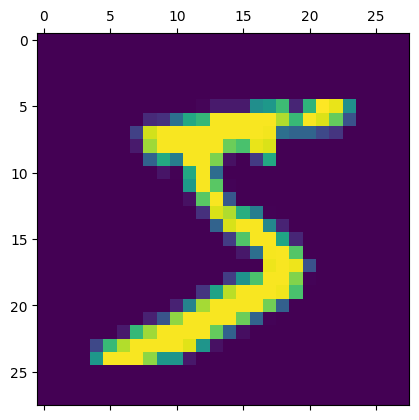

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [22]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs=5)

/opt/miniconda3/envs/mnist/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8109 - loss: 0.7226
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9165 - loss: 0.3053
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9204 - loss: 0.2872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9223 - loss: 0.2753
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9280 - loss: 0.2649


In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9127 - loss: 0.3036


[0.26904141902923584, 0.9239000082015991]

In [24]:
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


array([[3.0043466e-02, 3.7592969e-07, 4.4190720e-02, ..., 9.9977106e-01,
        9.2901103e-02, 6.7490923e-01],
       [4.2247134e-01, 3.6118221e-03, 9.9946219e-01, ..., 8.3535571e-13,
        1.5244432e-01, 2.6184257e-09],
       [4.6782900e-04, 9.9310607e-01, 6.2577063e-01, ..., 1.4662564e-01,
        3.9608201e-01, 4.4657558e-02],
       ...,
       [5.7933944e-06, 2.8164668e-06, 8.9939323e-04, ..., 2.4444699e-01,
        5.2490354e-01, 7.8461021e-01],
       [1.2521567e-04, 6.9769230e-05, 1.3635919e-04, ..., 4.3652533e-05,
        5.9279168e-01, 7.2513321e-05],
       [1.6770316e-02, 1.4309820e-10, 2.3790613e-01, ..., 2.0918568e-08,
        2.7544581e-04, 8.3956007e-07]], dtype=float32)

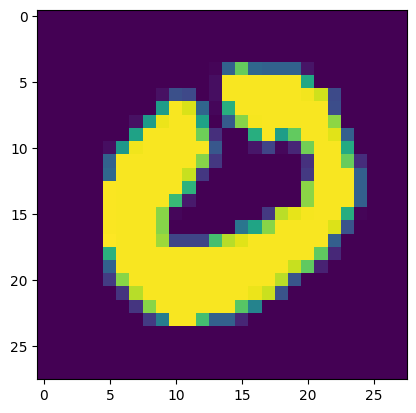

In [25]:
plt.imshow(X_test[25])

In [26]:
y_pred = model.predict(X_test_flattened)
y_pred[25]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


array([9.9998856e-01, 1.1601081e-16, 3.6374188e-03, 1.5365795e-07,
       6.4692991e-05, 4.4848189e-01, 9.2147541e-01, 2.7447270e-06,
       1.5274305e-02, 1.2876095e-05], dtype=float32)

In [28]:
np.argmax(y_pred[25])

0

In [29]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [31]:
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    2,    4,    2,   12,    0],
       [   7,    8,  923,   15,    7,    5,   13,   11,   41,    2],
       [   4,    0,   18,  906,    0,   40,    2,   12,   21,    7],
       [   1,    1,    2,    1,  914,    0,   14,    5,   10,   34],
       [  10,    2,    3,   19,    8,  795,   14,    6,   29,    6],
       [  11,    3,    3,    1,    7,   14,  915,    2,    2,    0],
       [   1,    6,   22,    7,    7,    1,    0,  946,    3,   35],
       [  10,    6,    6,   22,    9,   41,    9,   11,  852,    8],
       [  11,    7,    1,   10,   28,    9,    0,   22,    4,  917]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

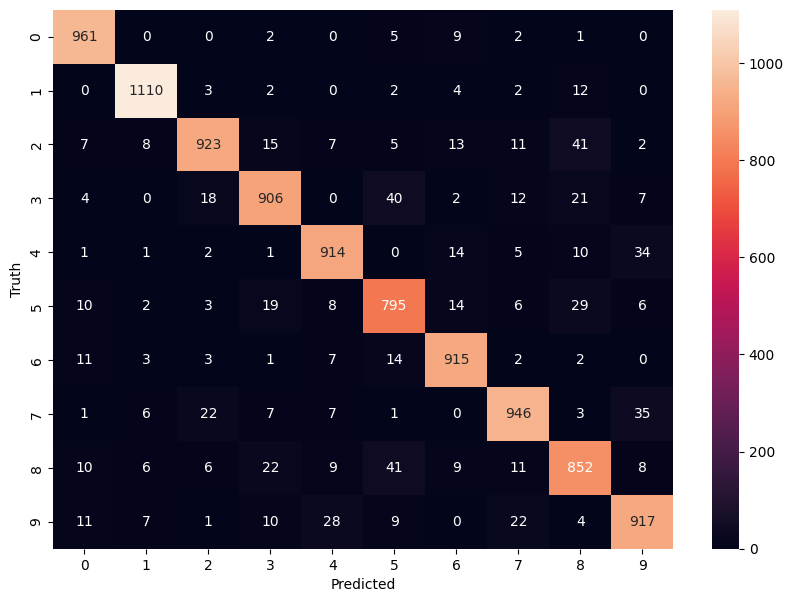

In [33]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


/opt/miniconda3/envs/mnist/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8710 - loss: 0.4539
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9589 - loss: 0.1382
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9745 - loss: 0.0872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9808 - loss: 0.0660
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9838 - loss: 0.0519


In [38]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0959


[0.08255071192979813, 0.9757000207901001]

In [39]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


Text(95.72222222222221, 0.5, 'Truth')

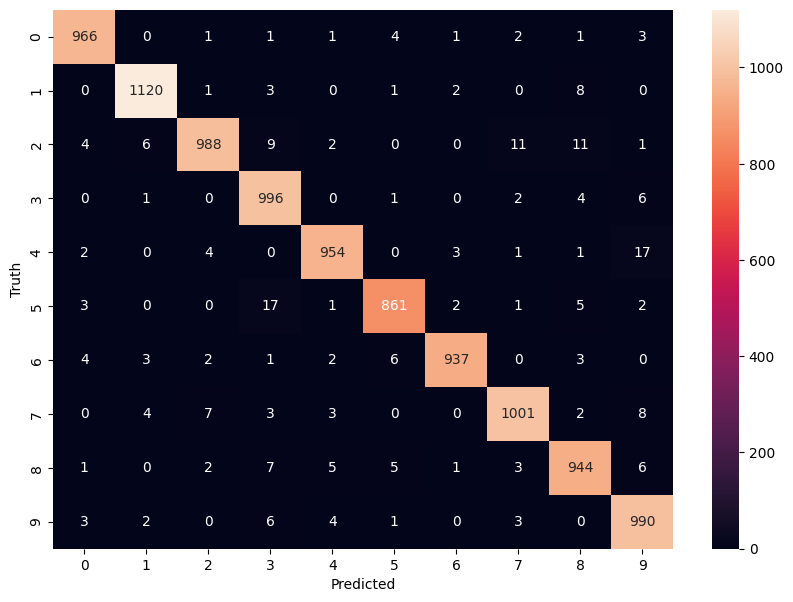

In [40]:
y_pred_labels = [np.argmax(i) for i in y_pred]
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize = (10, 7))
sn.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Without creating additional flattened array

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/opt/miniconda3/envs/mnist/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8691 - loss: 0.4606
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9605 - loss: 0.1339
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9726 - loss: 0.0917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9795 - loss: 0.0704
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0526
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9873 - loss: 0.0421
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9906 - loss: 0.0310
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9924 - loss: 0.0271
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9936 - loss: 0.0223
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9938 - loss: 0.0194


In [43]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.0951


[0.08608187735080719, 0.9764000177383423]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


Text(95.72222222222221, 0.5, 'Truth')

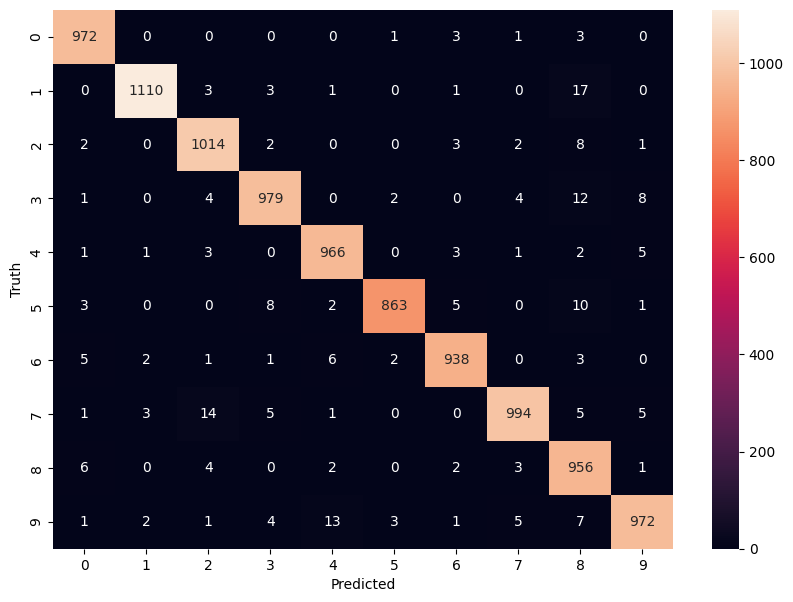

In [44]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize = (10, 7))
sn.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')